# ETL Pipeline - Diabetes Dataset

This notebook performs the ETL (Extract, Transform, Load) process on the diabetes dataset using numpy, pandas and scikit-learn.

In [167]:
# Import Required Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [168]:
# Load Dataset
df = pd.read_csv("C:/Users/kadam/OneDrive/Documents/internship_IV/diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [169]:
print(df.info())        # Column types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [170]:
print(df.describe())    # Summary statistics

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [171]:
# Renaming columns
df.rename(columns={'BloodPressure': 'BP'}, inplace=True)  # for convinence

In [172]:
# These medical features cannot realistically have a value of 0 (e.g., 0 glucose or 0 BMI is not physiologically possible).
# In the dataset, 0 likely indicates missing or unrecorded data, so we treat them as NaN for proper imputation later.

columns_with_zero_as_missing = ["Glucose", "BP", "SkinThickness", "Insulin", "BMI"]      
df[columns_with_zero_as_missing] = df[columns_with_zero_as_missing].replace(0, np.nan)
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [173]:
print(df.isnull().sum())       # Count NaN values in each column

Pregnancies                   0
Glucose                       5
BP                           35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


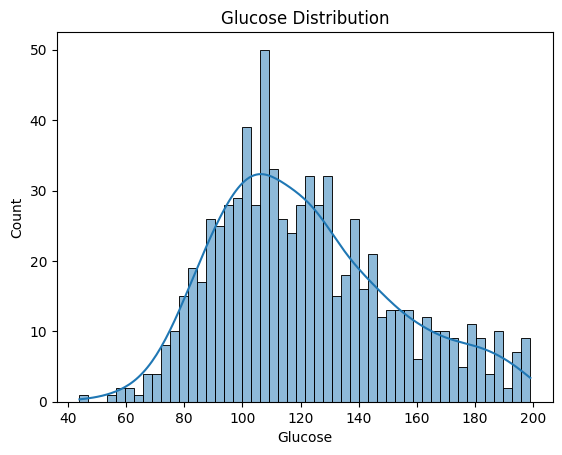

In [174]:
# To handle missing values:
# Using median for skewed data to reduce the effect of outliers.
# Using mean for unskewed data.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Glucose"], bins=50, kde=True)
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.show()

In [175]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

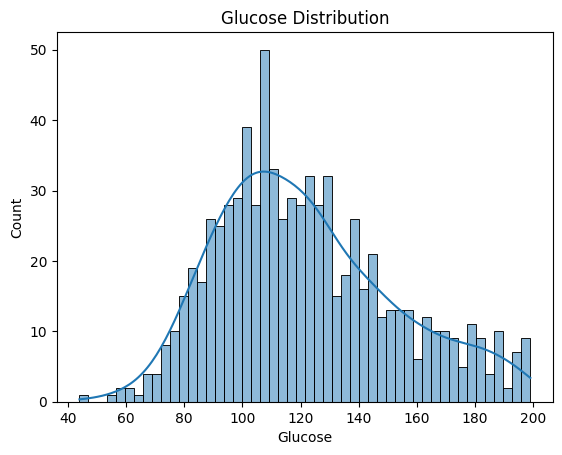

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Glucose"], bins=50, kde=True)
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.show()

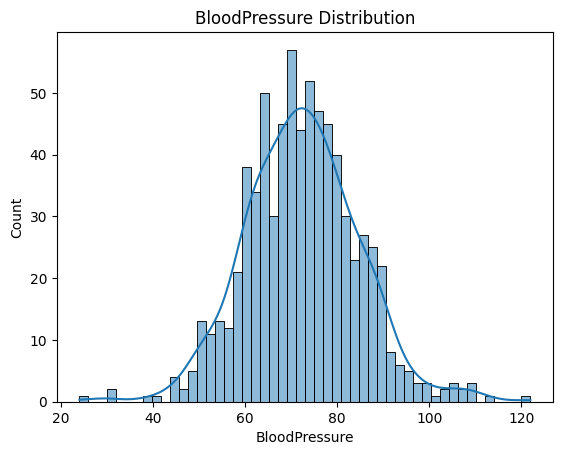

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["BP"], bins=50, kde=True)
plt.title("BloodPressure Distribution")
plt.xlabel("BloodPressure")
plt.show()

In [178]:
df['BP'] = df['BP'].fillna(df['BP'].mean())

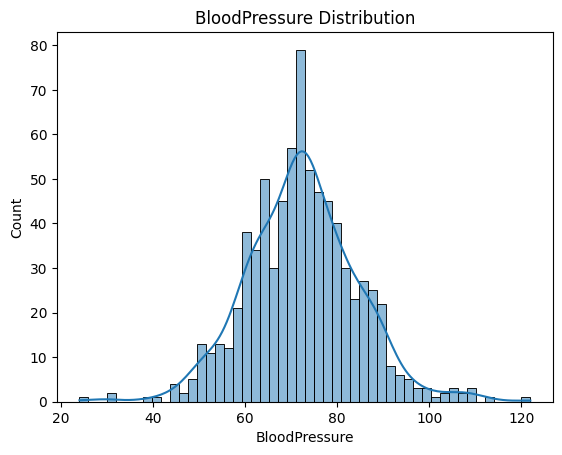

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["BP"], bins=50, kde=True)
plt.title("BloodPressure Distribution")
plt.xlabel("BloodPressure")
plt.show()

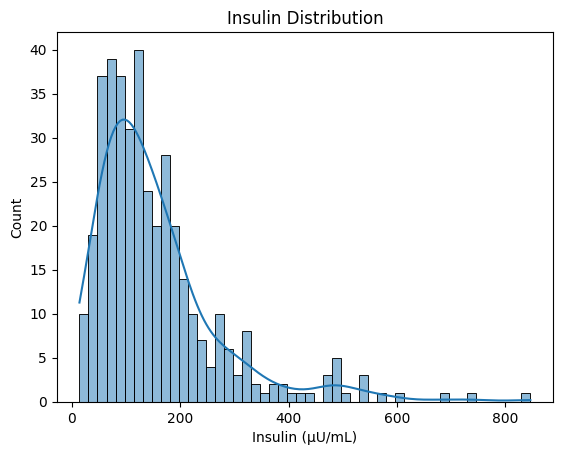

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Insulin"], bins=50, kde=True)
plt.title("Insulin Distribution")
plt.xlabel("Insulin (μU/mL)")
plt.show()

In [181]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

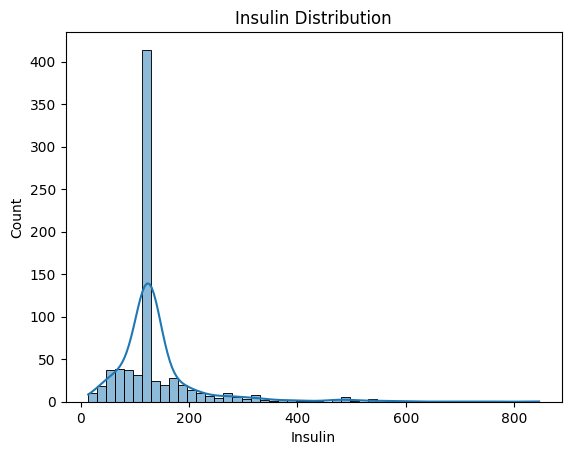

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Insulin"], bins=50, kde=True)
plt.title("Insulin Distribution")
plt.xlabel("Insulin")
plt.show()

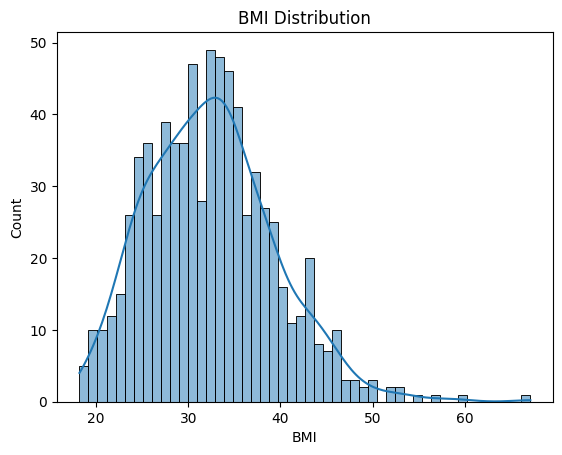

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["BMI"], bins=50, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

In [184]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

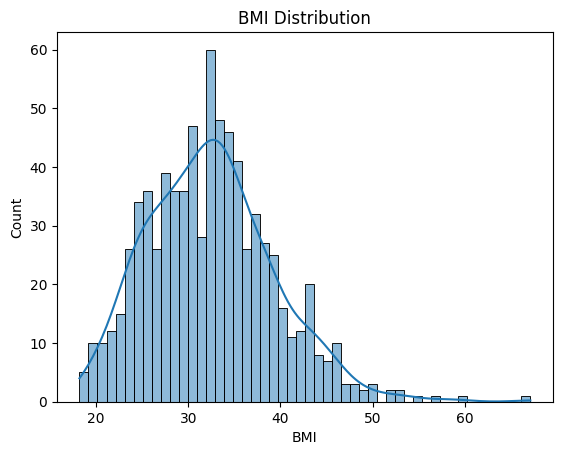

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["BMI"], bins=50, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()


In [186]:
print(df)

     Pregnancies  Glucose    BP  SkinThickness  Insulin   BMI  \
0              6    148.0  72.0           35.0    125.0  33.6   
1              1     85.0  66.0           29.0    125.0  26.6   
2              8    183.0  64.0            NaN    125.0  23.3   
3              1     89.0  66.0           23.0     94.0  28.1   
4              0    137.0  40.0           35.0    168.0  43.1   
..           ...      ...   ...            ...      ...   ...   
763           10    101.0  76.0           48.0    180.0  32.9   
764            2    122.0  70.0           27.0    125.0  36.8   
765            5    121.0  72.0           23.0    112.0  26.2   
766            1    126.0  60.0            NaN    125.0  30.1   
767            1     93.0  70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21 

In [187]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [188]:
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,125.0,30.1,0.349,47,1


In [189]:
# Feature Scaling
# Scale features to bring them to a similar range, improving model performance and convergence.
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()   # Standardize features by removing the mean and scaling to unit variance.
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [190]:
X_scaled_df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,0.558557,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.014657,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,NaN,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.587871,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.558557,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.297376,1.800521,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.198965,-0.205728,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.033518,-0.587871,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.026200,NaN,-0.181541,-0.342790,-0.371101,1.170732


In [191]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=10)

In [192]:
# Save to CSV
X_train.to_csv("C:/Users/kadam/OneDrive/Documents/internship_IV/diabetes/Preprocessed data/X_train.csv", index=False)
X_test.to_csv("C:/Users/kadam/OneDrive/Documents/internship_IV/diabetes/Preprocessed data/X_test.csv", index=False)
y_train.to_csv("C:/Users/kadam/OneDrive/Documents/internship_IV/diabetes/Preprocessed data/y_train.csv", index=False)
y_test.to_csv("C:/Users/kadam/OneDrive/Documents/internship_IV/diabetes/Preprocessed data/y_test.csv", index=False)